In [1]:
import numpy as np
import pandas as pd

In [2]:
# Загружаем данные
df = pd.read_csv('datasets\\dataset_Facebook.csv', sep=';')

In [3]:
# Посмотрим на наши данные
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4.0,3,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441,Status,2,12,3.0,10,0.0,10460.0,19057.0,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441,Photo,3,12,3.0,3,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441,Photo,2,12,2.0,10,1.0,50128.0,87991.0,2211.0,790.0,1119.0,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441,Photo,2,12,2.0,3,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,19.0,325.0,49.0,393


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   496 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           496 non-null float64
Post Hour                                                              500 non-null int64
Paid                                                                   497 non-null float64
Lifetime Post Total Reach                                              496 non-null float64
Lifetime Post Total Impressions                                        499 non-null float64
Lifetime Engaged Users                                                 496 n

In [5]:
# Уберем все пропуски
for column in df.columns:
    df = df[~df[column].isnull()]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 498
Data columns (total 19 columns):
Page total likes                                                       441 non-null int64
Type                                                                   441 non-null object
Category                                                               441 non-null int64
Post Month                                                             441 non-null int64
Post Weekday                                                           441 non-null float64
Post Hour                                                              441 non-null int64
Paid                                                                   441 non-null float64
Lifetime Post Total Reach                                              441 non-null float64
Lifetime Post Total Impressions                                        441 non-null float64
Lifetime Engaged Users                                                 441 n

In [7]:
# Переводим категориальные признаки
type_dict = {'Link' : 1, 
            'Photo' : 2,
            'Status' : 3,
            'Video' : 4}
df['Type'] = df['Type'].map(type_dict)

In [8]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2,2,12,4.0,3,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441,3,2,12,3.0,10,0.0,10460.0,19057.0,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441,2,3,12,3.0,3,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441,2,2,12,2.0,10,1.0,50128.0,87991.0,2211.0,790.0,1119.0,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441,2,2,12,2.0,3,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,19.0,325.0,49.0,393


In [9]:
# Посмотрим, как скоррелированы наши данные
df_corr = df.corr()
df_corr

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
Page total likes,1.000000,0.230697,-0.065040,0.947423,-0.025245,-0.155188,0.005409,-0.071363,-0.095221,-0.120611,-0.165446,-0.135453,-0.094743,-0.059894,0.026538,0.049102,0.069195,0.015133,0.063177
Type,0.230697,1.000000,0.035928,0.204868,0.007245,-0.004488,0.083997,0.078373,0.048469,0.318685,0.360571,0.234441,0.041140,0.172508,0.470555,0.061752,0.039522,0.090480,0.047131
Category,-0.065040,0.035928,1.000000,-0.103488,-0.032030,-0.108963,0.008421,-0.147027,-0.097932,-0.002154,-0.041001,-0.156262,-0.048634,-0.105062,0.024967,0.030636,0.129284,0.147480,0.127954
Post Month,0.947423,0.204868,-0.103488,1.000000,-0.003593,-0.185192,-0.014709,-0.092026,-0.095078,-0.137842,-0.178691,-0.159077,-0.096354,-0.101333,-0.018335,0.027421,0.044860,0.002081,0.039846
Post Weekday,-0.025245,0.007245,-0.032030,-0.003593,1.000000,0.051471,0.001385,-0.045076,-0.029498,-0.072738,-0.056080,-0.039316,-0.044653,-0.064849,-0.026771,-0.077108,-0.083748,-0.054322,-0.081484
Post Hour,-0.155188,-0.004488,-0.108963,-0.185192,0.051471,1.000000,-0.073862,0.002544,0.014292,-0.017935,-0.013103,0.061516,0.040011,0.052974,0.016884,-0.000140,-0.022517,-0.057740,-0.025581
Paid,0.005409,0.083997,0.008421,-0.014709,0.001385,-0.073862,1.000000,0.139358,0.056983,0.154857,0.142783,0.120579,-0.001532,0.104776,0.099595,0.068191,0.106731,0.089843,0.104467
Lifetime Post Total Reach,-0.071363,0.078373,-0.147027,-0.092026,-0.045076,0.002544,0.139358,1.000000,0.690540,0.588093,0.496375,0.337355,0.313444,0.743002,0.423508,0.423314,0.537736,0.454284,0.530981
Lifetime Post Total Impressions,-0.095221,0.048469,-0.097932,-0.095078,-0.029498,0.014292,0.056983,0.690540,1.000000,0.378329,0.326692,0.234559,0.850142,0.657937,0.347869,0.312757,0.337788,0.283080,0.335914
Lifetime Engaged Users,-0.120611,0.318685,-0.002154,-0.137842,-0.072738,-0.017935,0.154857,0.588093,0.378329,1.000000,0.964734,0.678858,0.261892,0.618372,0.817624,0.533897,0.591300,0.552054,0.593583


In [10]:
# Удаляем столбцы с сильной автокорреляцией 
indexes = []
corr_matrix = np.matrix(df_corr)
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if abs(corr_matrix[i, j]) > 0.8 and i != j:
            indexes.append(j)
for x in set(indexes):
    df.columns.delete(x)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2,2,12,4.0,3,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441,3,2,12,3.0,10,0.0,10460.0,19057.0,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441,2,3,12,3.0,3,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441,2,2,12,2.0,10,1.0,50128.0,87991.0,2211.0,790.0,1119.0,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441,2,2,12,2.0,3,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,19.0,325.0,49.0,393


In [11]:
# Целевая бинарная переменная
y = df['Paid']

# Поскольку перед нами стоит задача бинарной классификации, обучение будем проводить по модели логистической регрессии.

from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения

model = LogisticRegression()                         # инициализируем модель
model.fit(df, y)                                     # обучаем модель
predict = model.predict(df)  

# Посмотрим наглядно результаты прогнозов
list(zip(y, predict))

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0),

In [12]:
print('Количество ошибок: {:.0f} из {}.'.format(sum(abs(y - predict)), len(y)))

Количество ошибок: 122 из 441.


In [13]:
# Рассчитаем некоторые метрики

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report 
precision_score(y, predict) # точность модели
recall_score(y, predict) # полнота модели
accuracy_score(y, predict) # по сути это доля верных ответов
print(classification_report(y, predict))

             precision    recall  f1-score   support

        0.0       0.73      0.98      0.84       320
        1.0       0.44      0.03      0.06       121

avg / total       0.65      0.72      0.62       441



In [14]:
# Построим предсказания для тестового множества

from sklearn.model_selection import train_test_split
# Наличие random_state делает перемешивание выборки постоянным от запуска к запуску. Без нее перемешивание будет разным
# при каждом запуске кода
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

model = LogisticRegression()                     # инициализируем модель
model.fit(X_train, y_train)                      # обучаем модель
predict = model.predict(X_test)  

from sklearn.metrics import accuracy_score, f1_score

print('precision: ', precision_score(y_test, predict))
print('recall: ', recall_score(y_test, predict))
print('accuracy: ', accuracy_score(y_test, predict))
print('f1: ', f1_score(y_test, predict))

precision:  0.25
recall:  0.046511627906976744
accuracy:  0.678082191780822
f1:  0.07843137254901962


In [15]:
# Предсказываем вероятность (первый столбец - вероятность для X, второй - вероятность для Y)
predict_proba = model.predict_proba(X_test)
predict_proba[:,1]

array([0.18062269, 0.34328574, 0.22057066, 0.26575699, 0.39842038,
       0.41105502, 0.23326764, 0.19966192, 0.97321935, 0.35456146,
       0.25579772, 0.18068795, 0.24855103, 0.15064803, 0.27144468,
       0.40339796, 0.19498562, 0.32976156, 0.18078224, 0.1826885 ,
       0.17662702, 0.99899474, 0.15210595, 0.23678758, 0.34538422,
       0.37485608, 0.26578224, 0.24526213, 0.22069833, 0.22963817,
       0.27689031, 0.28352343, 0.19905593, 0.24541704, 0.19824041,
       0.26562251, 0.25765928, 0.27054086, 0.21145088, 0.44032766,
       0.19849427, 0.19828425, 0.25457386, 0.25472356, 0.20247952,
       0.27754153, 0.18307496, 0.39558005, 0.25677133, 0.18158176,
       0.22600329, 0.23903686, 0.51470011, 0.18152477, 0.20129826,
       0.28429288, 0.18486276, 0.18614768, 0.25265188, 0.51921097,
       0.18782215, 0.27453862, 0.25003066, 0.26849664, 0.22525877,
       0.18108169, 0.37915783, 0.22367217, 0.18103765, 0.19501589,
       0.14503784, 0.19765838, 0.20792365, 0.4841492 , 0.17931

(-0.01, 1.01)

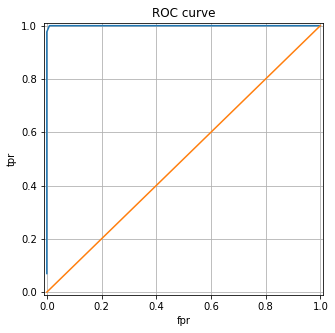

In [23]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [17]:
roc_auc_lr = roc_auc_score(y_test, predict_proba[:,1])
print(roc_auc_lr)

0.5102731993678031


In [18]:
# Сравним результаты с обучением по модели случайного леса.

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 1.0
recall 0.9767441860465116
accuracy 0.9931506849315068
f1 0.988235294117647


In [19]:
predict_proba = model.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, predict_proba[:,1])
print(roc_auc_rf)

0.9998871076992549


In [20]:
print('ROC AUC for:\nLogistic regression: {:.4f}\nRandom forest: {:.4f}'.format(roc_auc_lr, roc_auc_rf))

ROC AUC for:
Logistic regression: 0.5103
Random forest: 0.9999
